# Simulating a random process

In statistics we are interested in understanding how random variability affects a measurement.

For example, a person takes a multiple choice style IQ test. Their score will reflect their true IQ, but also some element of random chance (they will have guessed the questions they couldn't answer, and may have been lucky or unlucky in terms of how many guesses were correct).

As we will see in the course, randomness has predictable properties (!), for example, the influence of random chance tends to average out over lots of measurements (you might be lucky and guess 3/3 questions correctly, but not 100/100)

To understand the impact of randomess on our measurements, we can simulate a random process. That is what we will do in the next section.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Random number

We can ask the computer to generate a random number. The `np.random()` library is good for this!

For example, the following code block generates a random integer between 0 and 9.
* Run the code block a few times - you should get a different random number in the range [0,10) (ie 0-9 inclusive) each time

In [2]:
np.random.randint(0,10)

3

Of course we can make a loop to give us a few such random numbers - uncomment and complete the code block below

In [3]:
#n=100 # we will generate n random numbers
#MyRandomNumbers = np.empty(n) # create the output array

#for i in range(n):
#    YOUR CODE HERE
    
#print(MyRandomNumbers)

# Simulated coin flip

A random number can act as a model for a real world process.

For example, if we flip a fair coin, the chance of getting 'heads' is 0.5.

If we pick a random integer in the range <tt>[0,2)</tt> (ie, we pick <tt>0</tt> or <tt>1</tt>), the chance of getting <tt>1</tt> is 0.5.

We can think of this particular random number generator (in the range <tt>[0,2)</tt>) as a model for the coin toss, in that the chance of getting, say, 8/10 'heads' if we really tossed the coin is the same as getting 8/10 <tt>1</tt>'s from the random number generator.

* Run the code below a few times - the list of random 'coin toss outcomes' should change each time

In [4]:
n=10

for i in range(n):
    if np.random.randint(0,2)==0:
        print('HEADS')
    else:
        print('TAILS')


TAILS
HEADS
HEADS
TAILS
TAILS
HEADS
TAILS
HEADS
TAILS
TAILS


### Count the heads

Ultimately we might not be so interested in the whole sequence as some summary of it - for exammple how likely is it that we can get 8/10 'heads' for a fair coin?

* Uncomment the code below and modify it so that it fills up the output array 'heads' with 1s and 0s according to the random 'coin toss'

In [5]:
n=10
heads = np.empty(n)

for i in range(n):
    if np.random.randint(0,2)==0:
        heads[i]=1
    else:
        heads[i]=0
        
print(sum(heads))

6.0


If you run your code multiple times you should find that the nummber of heads varies, although you will more often get values near to 5/10 (as the coin is fair) than extreme values (such as 9/10 or 1/10)

## Double loop

What if we are interested in how much more often we get a 'close-to-even' outcome (4/10, 5/10, 6/10) vs an extreme outcome?

We need to run the 10-coin-toss simulation lots of times and note how any heads we got (out of 10) each time.

* Each time we simulate 10 coin tosses and count the number of heads is one 'repetition' of the simulation

Above, you created *repetitions* informally by running the code block above any times. 

We can actually make a loop *around our loop* to do this automatically!




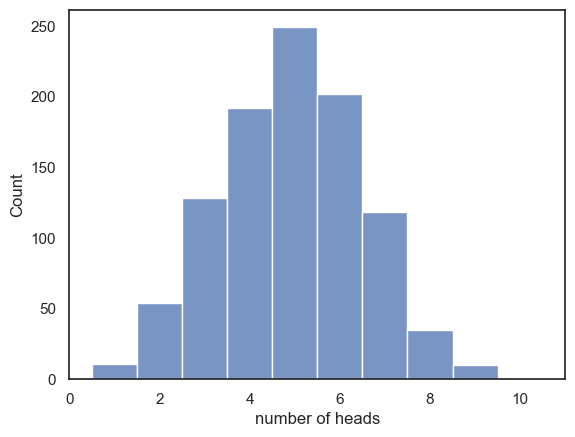

In [6]:
reps = 1000 # how mmany times will we repeat our 10-coin-toss simulation?
nHeads = np.empty(reps)

for j in range(reps):
    n=10
    heads = np.empty(n)

    for i in range(n):
        if np.random.randint(0,2)==0:
            heads[i]=1
        else:
            heads[i]=0
        
    nHeads[j]=sum(heads)
    
# histogram of the number of repetitions in which 0,1,2... etc heads were obtained    
sns.histplot(nHeads, bins=np.arange(-0.5,10.5,1))
plt.xlim(0,11)
plt.xlabel('number of heads')
plt.show()
    

Indeed, the fairer outcomes are more likely

### Comprehension questions

**a. In the douple loop we have two counter variables, <tt>i</tt> and <tt>j</tt>...**

* Which counter variable keeps track of our position within the run of 10 coin tosses?
* Which counter variable keeps track of how many *repetitions* of the simulation we ran?

**b. At the end of the simulation, what are the values of <tt>i</tt> and <tt>j</tt>?**
* Think then uncomment the code below and check!

In [7]:
# print('i:' + str(i))
# print('j:' + str(j))

Remember in Python we count from zero (soooo confusing!)

## Exercise: Galton Board simulation

In the Galton Board, ball bearings are dropped from a funnel onto a board with pins sticking out.

As each ball bearing goes down the board, each time it hits a pin it bounces left or right:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk1_GaltonBoard.jpg" width=30% />


The ball's ultimate horizontal position depends upon how many times it (randomly) bounces left or right. 
* To arrive at the very right hand side of the board, it must bounce rightwards evey time it hits a pin
* If the ball bounces leftwards and rightwards equally often, it will land in the centre

When a large number of balls are released into the Galton Board, we effectvely have a large number of 'repeats' of the random bouncing process, which reveals that balanced/fair outcomes (with roughly equal numbers of leftwards and rightward bounces) are more likely

Here is a nice YouTube video of the Galton board in action:

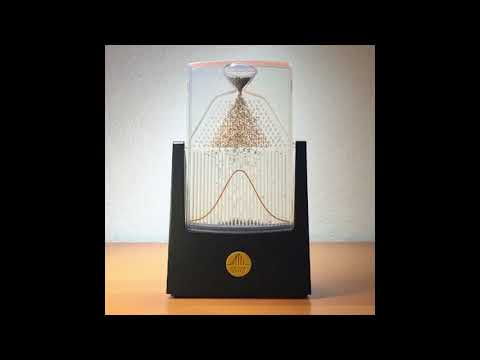

In [8]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('EvHiee7gs9Y')

### Simulate a single ball

We start by simulating the trajectory of a single ball. Let's assume out Galton board has 10 rows of pins:

<iframe width=”560" height=”315" src=”https://youtu.be/EvHiee7gs9Y?si=OihJCk0ZJQG2l2jk"></iframe>


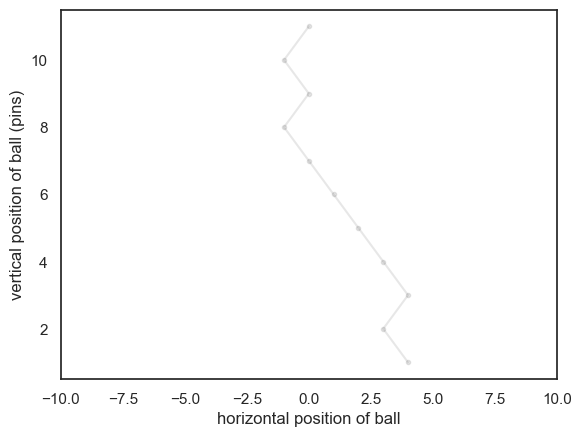

In [9]:
nPins=10
x = np.empty(nPins+1) # we include an extra "slot" for the start position, 0

x[0]=0 # we start at position x=0

for i in range(1,nPins+1): # note the 10 bounces are in positions x[1-10], not x[0-9]
    if np.random.randint(0,2) == 0:
        x[i]=x[i-1]+1 # bounce right - increase x by 1
    else:
        x[i]=x[i-1]-1 # bounce left - decrease x by 1

y=range(nPins+1, 0, -1)

# plot the trajectory of the ball
plt.plot(x, y, 'k.-', alpha=0.1)
plt.xlim(-10,10)
plt.xlabel('horizontal position of ball')
plt.ylabel('vertical position of ball (pins)')
plt.show()

If you run the code block above a few times, you should see the simulated trajectory change each time

### Comprehension Questions

**a. What are we doing with the code `x=np.empty(nPins)`?**

**b. What is the size of <tt>x</tt>**?
* Think then check!

In [10]:
# len(x)

**c. What is the size of y?**
* Think then write your own code to check!

In [11]:
# YOUR CODE HERE

**d. In this simulation, each value in the array <tt>x</tt> records the horizontal position of the ball.**
* What are the possible values in array <tt>x</tt>?
* What were the possible values in the array <tt>heads</tt> in the coin toss simmulation?

**e. Looking at the plot above, what is the value of x[9]?**
* Think then check!


In [12]:
# x[9]

**f. Can you explain what is similar about the the coin toss and Galton Board simulations, and what is different?**
* **answer** - 
    * The Galton board simulation is cumulative (we keep track of hthe total number of leftwardss- and rightwards- bounces so far)
    * This allows us to plot the trajectory
    * The coin toss simulation we recoprd each outcome separately and add them up at the end

However, on a deep level the two simulations are related - 
* Ultimately, the distribution of end points on the Galton board will have the same shape as the distribution of number of heads!



## Double Loop

The point of the Galton Board is to release lots of ball bearings and observe where they are omre *likely* to end up

To simulate this we create an outer loop that runs our one-ball simmulation many times

If you are feeling adventurous, you can try yourself to complete the second loop around the outside of the code below! 
* fill in the sections marked "....."
* If you don't fancy it, you can skip ahead to the pre-coded solution

In [13]:
#reps = 40 # how mmny times will we repeat our single-ball simulation?
#finalPos = ...... # array to store the final horiontal positions

#for j ......
#    nPins=10
#    x = np.empty(nPins+1)

#    x[0]=0 # we start at position x=0

#    for i in range(1,nPins+1):
#        if np.random.randint(0,2) == 0:
#            x[i]=x[i-1]+1 # bounce right - increase x by 1
#        else:
#            x[i]=x[i-1]-1 # bounce left - decrease x by 1

#    y=range(nPins+1, 0, -1)

#    # plot the trajectory of the ball
#    plt.plot(x, y, 'k.-', alpha=0.1)
    
#    finalPos[j]=x[nPins]

## Plot the trajectories
#plt.xlim(-10,10)
#plt.xlabel('horizontal position of ball')
#plt.ylabel('vertical position of ball (pins)')
#plt.show()
    

...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
... scroll down for the ready-made answer:
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>
...<br>

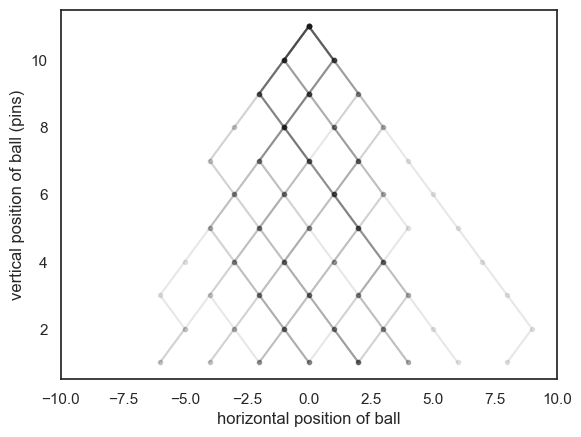

In [14]:
reps = 25 # how mmny times will we repeat our single-ball simulation?
finalPos = np.empty(reps) # array to store the final horiontal positions

for j in range(reps):
    nPins=10
    x = np.empty(nPins+1)

    x[0]=0 # we start at position x=0

    for i in range(1,nPins+1):
        if np.random.randint(0,2) == 0:
            x[i]=x[i-1]+1 # bounce right - increase x by 1
        else:
            x[i]=x[i-1]-1 # bounce left - decrease x by 1

    y=range(nPins+1, 0, -1)

    # plot the trajectory of the ball
    plt.plot(x, y, 'k.-', alpha=0.1)
    
    finalPos[j]=x[nPins]
    
plt.xlim(-10,10)
plt.xlabel('horizontal position of ball')
plt.ylabel('vertical position of ball (pins)')
plt.show()
    


The darker lines are places where more than one ball has passed through

* Run the simulation a few times - You should get a slightly different set of trajectories each time
* You will notice that the balls are most likely to end up near the middle
    * This reflects the fact that even mixtures of leftwards- and rightwards- bounces are more likely than extreme cases in which the ball bounces in the same direction all the time
    
We saved the final postions of the balls in the array <tt>finalPos</tt>, and we can use this to plot a histogram of their final positions:

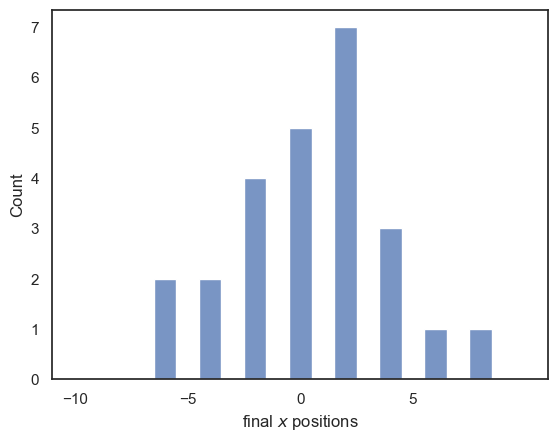

In [15]:
# histogram of the final positions for many balls    
sns.histplot(finalPos, bins=np.arange(-10.5,10.5,1))
plt.xlim(-11,11), plt.xticks(np.arange(-10,10,5))
plt.xlabel('final $x$ positions')
plt.show()
    

## Exercises

* You may like to increase the number of balls in the simulation - you should get a tidier-looking distribution of end points with more balls
* You could try increasing the number of pins. What happens to the histogram of endpoints when you do this?

## Significance of the Galton Board simulation

The Galton board illustrates how a combination of multiple random influences produces a certain pattern of final outcomes, namely a Normal Distribution.

We will meet this idea again in the block on Statistical Theory.